In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
data=pd.read_csv('gold_data.csv')

In [ ]:
print(data)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [ ]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
X=data.drop(['Date','GLD'],axis=1)

y=data["GLD"]

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)
print(x_train)
print(y_train)

              SPX        USO        SLV   EUR/USD
476   1138.500000  39.790001  16.889999  1.361693
1958  2202.939941  10.630000  15.800000  1.063886
248    700.820007  24.480000  12.770000  1.256408
2231  2656.000000  11.890000  15.570000  1.225280
1325  1838.880005  33.040001  19.420000  1.366998
...           ...        ...        ...       ...
1071  1409.150024  32.320000  32.980000  1.287515
433   1132.989990  40.270000  17.230000  1.442398
674   1286.119995  38.610001  27.389999  1.357276
1099  1461.890015  33.919998  29.180000  1.306745
1608  2092.429932  18.500000  15.600000  1.057295

[1832 rows x 4 columns]
476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1832, dtype: float64


In [ ]:
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
predictions=model.predict(x_test)

In [ ]:
print(predictions)

[168.59019946  81.73830019 115.84629993 127.66410065 120.73590124
 154.69569749 150.52699854 126.14909968 117.61229878 125.71920127
 116.88740087 171.82820065 141.92379825 167.74659836 115.2077999
 117.72450034 139.20200349 170.08370092 159.7835032  155.63789951
 155.11209954 125.32300045 175.97430002 156.75830248 125.18810056
  93.98049981  77.36529985 120.3236     119.14099981 167.49019992
  88.07710063 125.35780034  91.17940065 117.52190029 121.12629894
 136.12510063 115.4860009  115.38810053 148.59560036 107.23040108
 104.41080252  87.28209796 126.50480032 117.9293996  152.45049899
 119.53570008 108.34660001 108.26759835  93.19210018 126.96279828
  75.39960029 113.60979911 121.32170019 111.23989919 118.93709903
 121.09559927 159.16169905 169.39840103 146.91949642  85.96299854
  94.30950029  86.85709915  90.66850002 119.01630053 126.44800089
 127.43740004 169.3950996  122.34739914 117.48289871  98.7539006
 167.94150003 143.51609913 132.00460237 121.08410187 121.06689951
 119.7970004

In [ ]:
error_score = metrics.r2_score(y_test, predictions)
print("R squared error : ", error_score)

R squared error :  0.9892499772523656


In [ ]:
y_test = list(y_test)


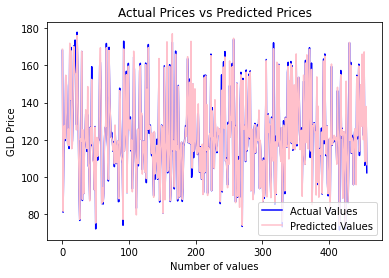

In [ ]:
plt.plot(y_test, color='blue', label = 'Actual Values')
plt.plot(predictions, color='pink', label='Predicted Values')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend(loc='lower right')
plt.show()